In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV,train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron

In [2]:
data=pd.read_csv('2015.csv')

In [3]:
data.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

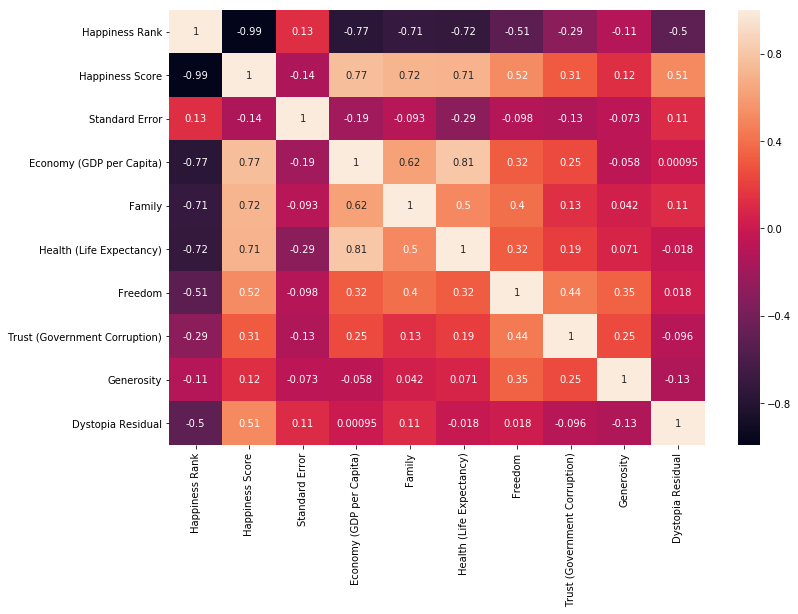

In [4]:
plt.subplots(figsize=(12, 8))
top_corr = data[abs(data['Happiness Rank']>6.5)].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

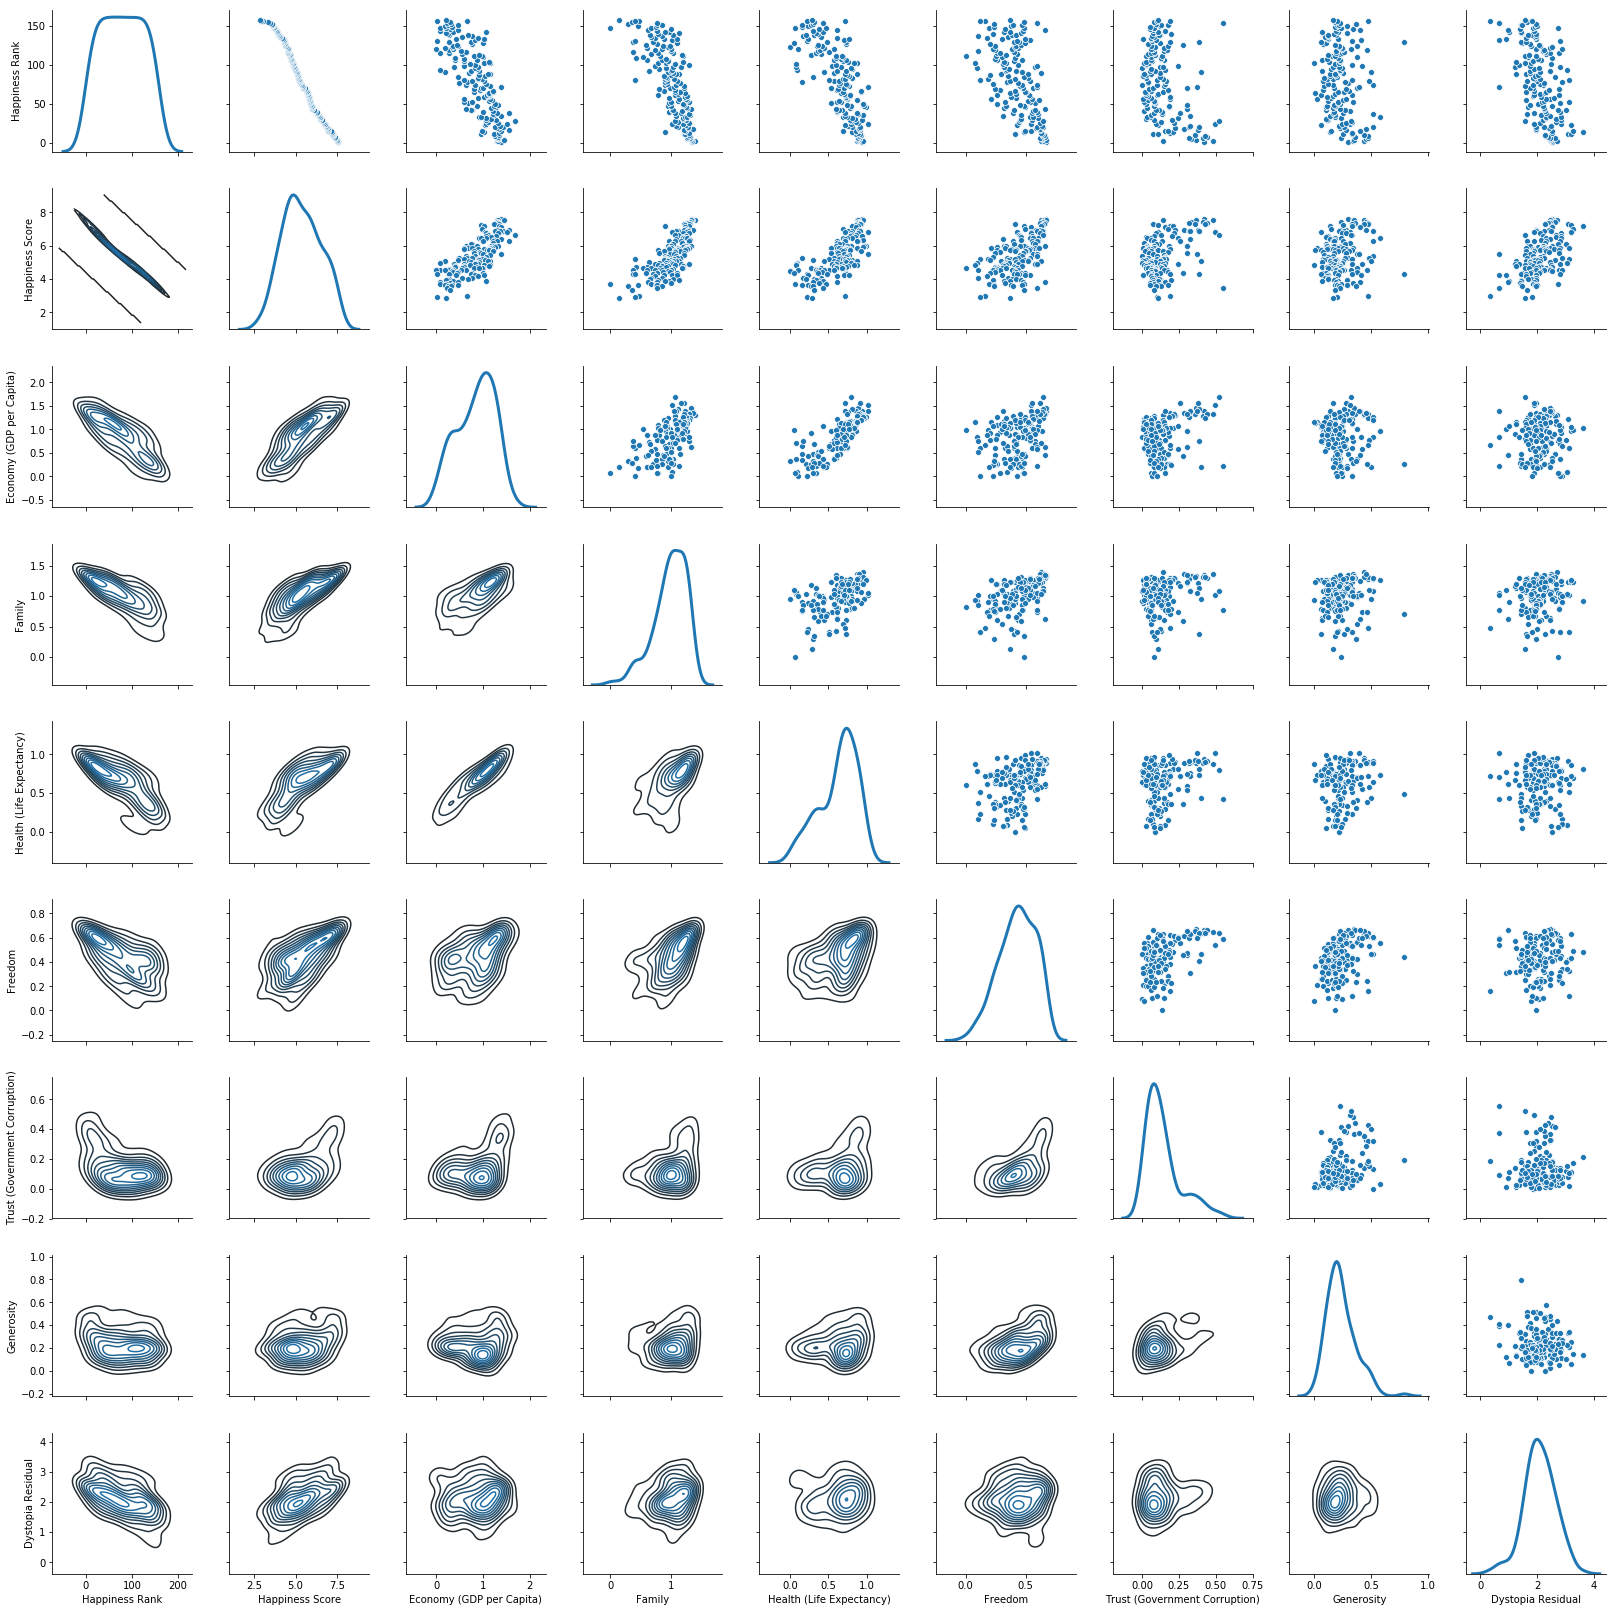

In [5]:
g = sns.PairGrid(data, diag_sharey=False, x_vars=["Happiness Rank", "Happiness Score","Economy (GDP per Capita)", "Family", "Health (Life Expectancy)", "Freedom", "Trust (Government Corruption)","Generosity", "Dystopia Residual"],y_vars=["Happiness Rank", "Happiness Score","Economy (GDP per Capita)", "Family", "Health (Life Expectancy)", "Freedom", "Trust (Government Corruption)","Generosity", "Dystopia Residual"])
g.map_lower(sns.kdeplot)
g.map_upper(sns.scatterplot)
g.map_diag(sns.kdeplot, lw=3)
plt.show()

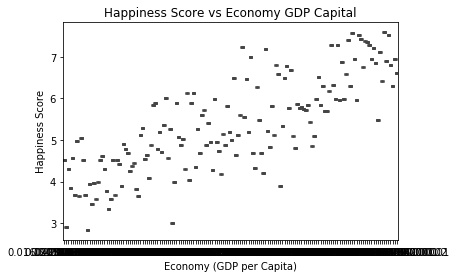

In [6]:
ax = sns.boxplot(y="Happiness Score", x="Economy (GDP per Capita)",data=data, linewidth=2.5)
plt.title('Happiness Score vs Economy GDP Capital')
plt.show()

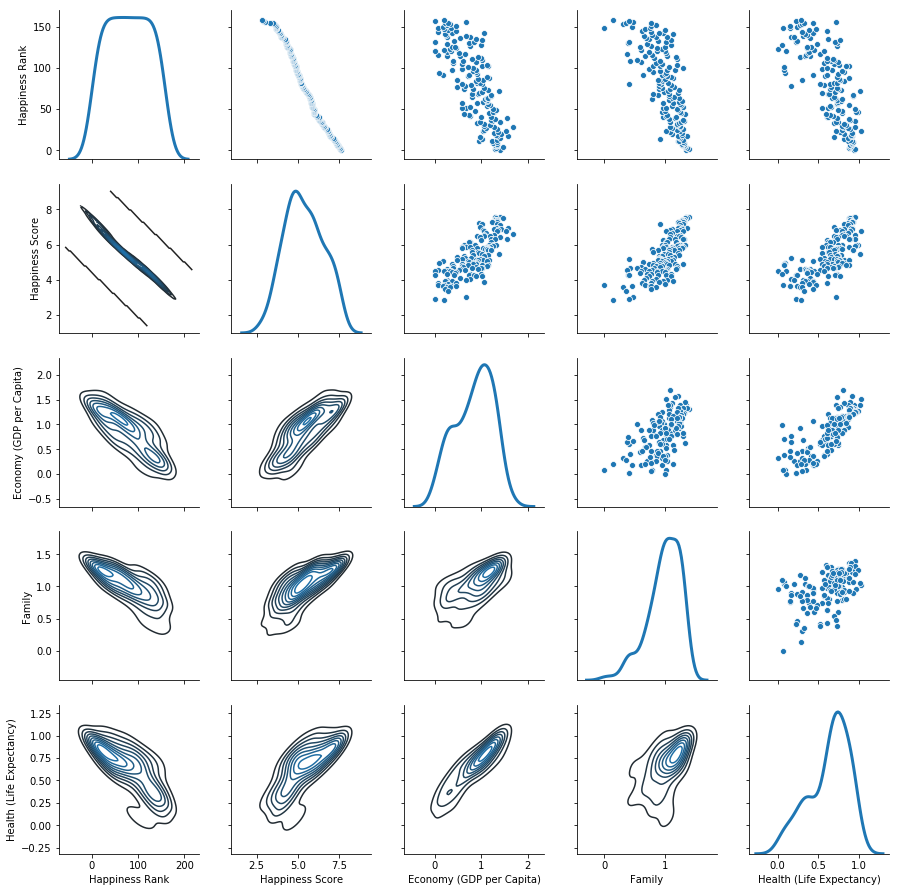

In [7]:
g = sns.PairGrid(data, diag_sharey=False, x_vars=["Happiness Rank", "Happiness Score","Economy (GDP per Capita)", "Family", "Health (Life Expectancy)"],y_vars=["Happiness Rank", "Happiness Score","Economy (GDP per Capita)", "Family", "Health (Life Expectancy)"])
g.map_lower(sns.kdeplot)
g.map_upper(sns.scatterplot)
g.map_diag(sns.kdeplot, lw=3)
plt.show()

In [8]:
X1 = data[["Economy (GDP per Capita)","Family", "Health (Life Expectancy)", "Freedom", "Trust (Government Corruption)","Generosity"]].values
y1=data["Happiness Score"]
# X1=data[["Economy (GDP per Capita)", "Family", "Health (Life Expectancy)", "Freedom", "Trust (Government Corruption)","Generosity", "Dystopia Residual"]]

In [9]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=0)

In [10]:
regressor = LinearRegression()  
regressor.fit(X1_train, y1_train)
y1_pred = regressor.predict(X1_test)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y1_test, y1_pred)))

Root Mean Squared Error: 0.5765099819233617


In [11]:
from sklearn.neural_network import MLPRegressor
reg = MLPRegressor(hidden_layer_sizes=(48,),max_iter=2000)
reg.fit(X1_train, y1_train.values.ravel())
y1_pred = reg.predict(X1_test)
me = metrics.mean_squared_error(y1_test.values, y1_pred)
print('Root Mean Squared Error:', np.sqrt(me))

Root Mean Squared Error: 0.5389506868855388
